<a href="https://colab.research.google.com/github/Neersha/Machine-learning/blob/main/REE_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_excel("pca.xlsx")
df1.head()

,La139,Ce140,Pr141,Nd146,Sm147,Eu153,Gd157,Tb159,Dy163,Ho165,Er166,Tm169,Yb172,Lu175,Target
0,599307.00,430915.41,373610.91,266999.28,162562.34,4306.48,87524.13,43189.85,20027.87,7337.81,2511.36,713.09,310.63,168.07,1
1,463643.59,352065.59,312387.44,228943.67,129232.98,20722.96,75621.41,39156.93,22579.83,12060.15,6958.35,3489.56,1863.23,1175.64,3
2,393657.31,307337.44,269842.97,200244.06,116095.56,1945.01,63985.72,27525.04,12046.29,4650.78,1997.49,739.59,392.27,209.60,1
3,423163.09,325541.44,291522.09,221782.03,122839.50,1925.81,66566.73,30793.18,15046.62,6908.40,3269.62,1298.86,643.64,362.85,1
4,440118.63,345418.31,301558.91,232021.61,128381.46,4052.35,70105.70,35392.18,20505.88,11780.74,6902.24,3548.80,1970.26,1105.88,4


In [3]:
df1.describe()

,La139,Ce140,Pr141,Nd146,Sm147,Eu153,Gd157,Tb159,Dy163,Ho165,Er166,Tm169,Yb172,Lu175,Target
count,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,4.485295e+05,343806.547627,300374.206610,222009.510000,122351.483390,10083.43661,65087.514407,33114.690847,19057.29678,10028.598136,5578.243559,2851.886102,1569.001186,900.718644,2.932203
std,1.660292e+05,125667.002707,108779.179376,80412.726134,43296.767547,14215.08901,23325.891893,13094.363612,8765.24887,5150.788052,3253.254316,1909.322327,1118.349621,660.956623,1.298068
min,2.205574e+05,155523.270000,134468.160000,94909.880000,45702.090000,1245.02000,23830.090000,13659.040000,8464.24000,3359.040000,1402.090000,446.090000,253.570000,142.710000,1.000000
25%,3.524361e+05,265093.010000,233522.860000,169924.065000,97398.130000,2845.23500,51384.355000,25827.060000,14483.32000,6591.685000,3015.195000,1313.840000,643.935000,360.975000,1.000000
50%,4.231631e+05,325541.440000,287266.590000,210216.550000,117229.160000,6106.74000,61753.460000,30358.980000,17612.09000,9805.180000,5380.990000,2708.760000,1301.640000,724.590000,4.000000
75%,4.780001e+05,368950.720000,323028.405000,243088.775000,134006.995000,10134.70000,70856.100000,36192.110000,21329.89000,11957.825000,7161.990000,3857.125000,2137.120000,1196.905000,4.000000
max,1.115099e+06,868159.690000,757612.310000,566354.560000,317346.310000,76970.99000,172342.410000,90446.060000,54784.92000,30387.860000,18109.410000,9654.440000,5782.940000,3176.250000,4.000000


In [8]:
covarianceMatrix=pd.DataFrame(data=np.cov(df1, rowvar=False),columns=df1.columns,index=df1.columns)
covarianceMatrix

,La139,Ce140,Pr141,Nd146,Sm147,Eu153,Gd157,Tb159,Dy163,Ho165,Er166,Tm169,Yb172,Lu175,Target
La139,1.017241,1.012112,1.007618,0.998943,0.994219,0.489390,0.986458,0.932936,0.802420,0.637033,0.479094,0.326196,0.262011,0.208884,0.053647
Ce140,1.012112,1.017241,1.015366,1.011488,1.007173,0.421592,0.994989,0.917473,0.775340,0.611171,0.458116,0.308339,0.250943,0.198432,0.033034
Pr141,1.007618,1.015366,1.017241,1.014839,1.010168,0.399508,0.997805,0.912556,0.766422,0.602926,0.449824,0.299019,0.242344,0.189982,0.021035
Nd146,0.998943,1.011488,1.014839,1.017241,1.011607,0.353937,0.996124,0.895322,0.743400,0.582322,0.433442,0.284698,0.231741,0.179567,0.013231
Sm147,0.994219,1.007173,1.010168,1.011607,1.017241,0.341456,1.007890,0.910128,0.755280,0.592743,0.446474,0.300713,0.252173,0.201078,0.007752
Eu153,0.489390,0.421592,0.399508,0.353937,0.341456,1.017241,0.387365,0.612789,0.666618,0.549487,0.411432,0.291889,0.195242,0.150597,0.338465
Gd157,0.986458,0.994989,0.997805,0.996124,1.007890,0.387365,1.017241,0.950456,0.811805,0.654130,0.506713,0.358090,0.305769,0.254004,0.029719
Tb159,0.932936,0.917473,0.912556,0.895322,0.910128,0.612789,0.950456,1.017241,0.969557,0.850612,0.713662,0.571338,0.504971,0.451335,0.165245
Dy163,0.802420,0.775340,0.766422,0.743400,0.755280,0.666618,0.811805,0.969557,1.017241,0.971964,0.879101,0.767371,0.702336,0.654694,0.270868
Ho165,0.637033,0.611171,0.602926,0.582322,0.592743,0.549487,0.654130,0.850612,0.971964,1.017241,0.988739,0.923948,0.875911,0.841137,0.324742


In [10]:
eigenvalues, eigenvectors=np.linalg.eig(covarianceMatrix)
eigenvalues
eigenvectors

array([[ 2.88873394e-01,  2.26123579e-01,  3.99886333e-02,
        -2.42766681e-02, -3.19779508e-01,  8.20624668e-02,
        -6.61558740e-01, -3.37926654e-01,  1.47148259e-01,
        -2.54038246e-03, -1.02823279e-01,  4.52933865e-02,
        -2.73702296e-01, -3.04983588e-01, -1.31587773e-02],
       [ 2.85178509e-01,  2.38227800e-01,  2.06606777e-02,
        -9.90254539e-02, -2.75950064e-01,  5.76915375e-02,
        -2.09871665e-01,  1.90229273e-01,  4.79464976e-02,
         5.82189965e-02,  3.13044508e-01, -2.02412375e-01,
         3.60888757e-01,  5.81921902e-01, -2.80085771e-01],
       [ 2.83353128e-01,  2.43547992e-01,  1.28063095e-02,
        -1.18519597e-01, -2.06716954e-01,  1.39917233e-01,
         1.37966173e-01,  2.13819533e-01, -3.00270012e-01,
        -2.42911786e-01, -4.48695087e-01, -1.65673623e-01,
         6.82290676e-02,  7.60547277e-02,  5.75099575e-01],
       [ 2.79011159e-01,  2.49843494e-01,  4.25197031e-03,
        -1.66948708e-01, -1.81742217e-01,  2.04280688

In [11]:
eigenvalues

array([9.76820329e+00, 3.63923628e+00, 1.54658075e+00, 8.45344668e-01,
       8.08065627e-02, 2.62933902e-02, 9.13919258e-03, 3.51210886e-03,
       2.43481511e-03, 3.61184185e-04, 4.66301011e-04, 1.25508250e-03,
       1.10355690e-03, 7.46185934e-04, 8.75485635e-04])

In [12]:
totalSum=sum(eigenvalues)
var_exp=[(i/totalSum)*100 for i in sorted(eigenvalues,reverse=True)]
var_exp

[61.333562701789916,
 22.850397317455098,
 9.710824456289298,
 5.307833858159729,
 0.5073762522336287,
 0.16509354381583288,
 0.05738406792420653,
 0.02205217706899565,
 0.015287958333296726,
 0.007880536334516217,
 0.006929122430562835,
 0.005497085950959922,
 0.0046852261773026585,
 0.0029278569884179217,
 0.002267839048249851]

In [13]:
featureVector=eigenvectors[:,:3]
featureVector

array([[ 0.28887339,  0.22612358,  0.03998863],
       [ 0.28517851,  0.2382278 ,  0.02066068],
       [ 0.28335313,  0.24354799,  0.01280631],
       [ 0.27901116,  0.24984349,  0.00425197],
       [ 0.28142836,  0.24233511, -0.00929887],
       [ 0.17261237, -0.00810807,  0.31169245],
       [ 0.29105701,  0.21115754, -0.01161914],
       [ 0.3136497 ,  0.07418415,  0.0224347 ],
       [ 0.31095005, -0.07563598,  0.00678289],
       [ 0.290837  , -0.21021738, -0.06048456],
       [ 0.26055194, -0.30170076, -0.10837734],
       [ 0.22408298, -0.36717461, -0.14278218],
       [ 0.20643181, -0.38346475, -0.17419802],
       [ 0.19129711, -0.39757818, -0.19296451],
       [ 0.08010384, -0.28395262,  0.89246734]])

In [15]:
featureVectorTranspose=np.transpose(featureVector)
df1Transpose=np.transpose(df1)
newdf1Transpose=np.dot(featureVectorTranspose,df1Transpose)
newdf1=np.transpose(newdf1Transpose)
newdf1

array([[ 0.54499342,  2.57248451,  1.53471262],
       [ 1.35924538, -1.23861321,  2.68023851],
       [-2.06283496,  1.21440076,  1.40678827],
       [-1.18523793,  0.96009556,  1.2292255 ],
       [ 0.90698374, -1.62086741,  3.19537955],
       [-0.8668192 ,  0.02791712,  3.83689427],
       [-3.20256217,  0.83134119,  1.45979285],
       [ 2.85376188, -4.32305436,  1.34009194],
       [-0.58540622, -1.07366547,  0.67234157],
       [-2.35123357, -3.30761078,  2.25436872],
       [-0.05933551, -1.60065782,  3.71885394],
       [-3.30225372, -1.15060533,  3.95988998],
       [-1.11442962, -2.46039653,  2.32710819],
       [-2.37378057,  0.96585414,  1.37087573],
       [ 0.37399497, -2.08308981,  3.20762305],
       [-1.51461315, -2.72999471,  0.29363561],
       [-1.44932694,  0.68823757,  4.05905688],
       [-2.0647279 ,  1.82366491,  1.53572352],
       [ 0.81559186, -0.20306329,  2.68595291],
       [-2.52589147, -2.92134689,  2.41777052],
       [-1.16593421, -0.10489723,  3.851

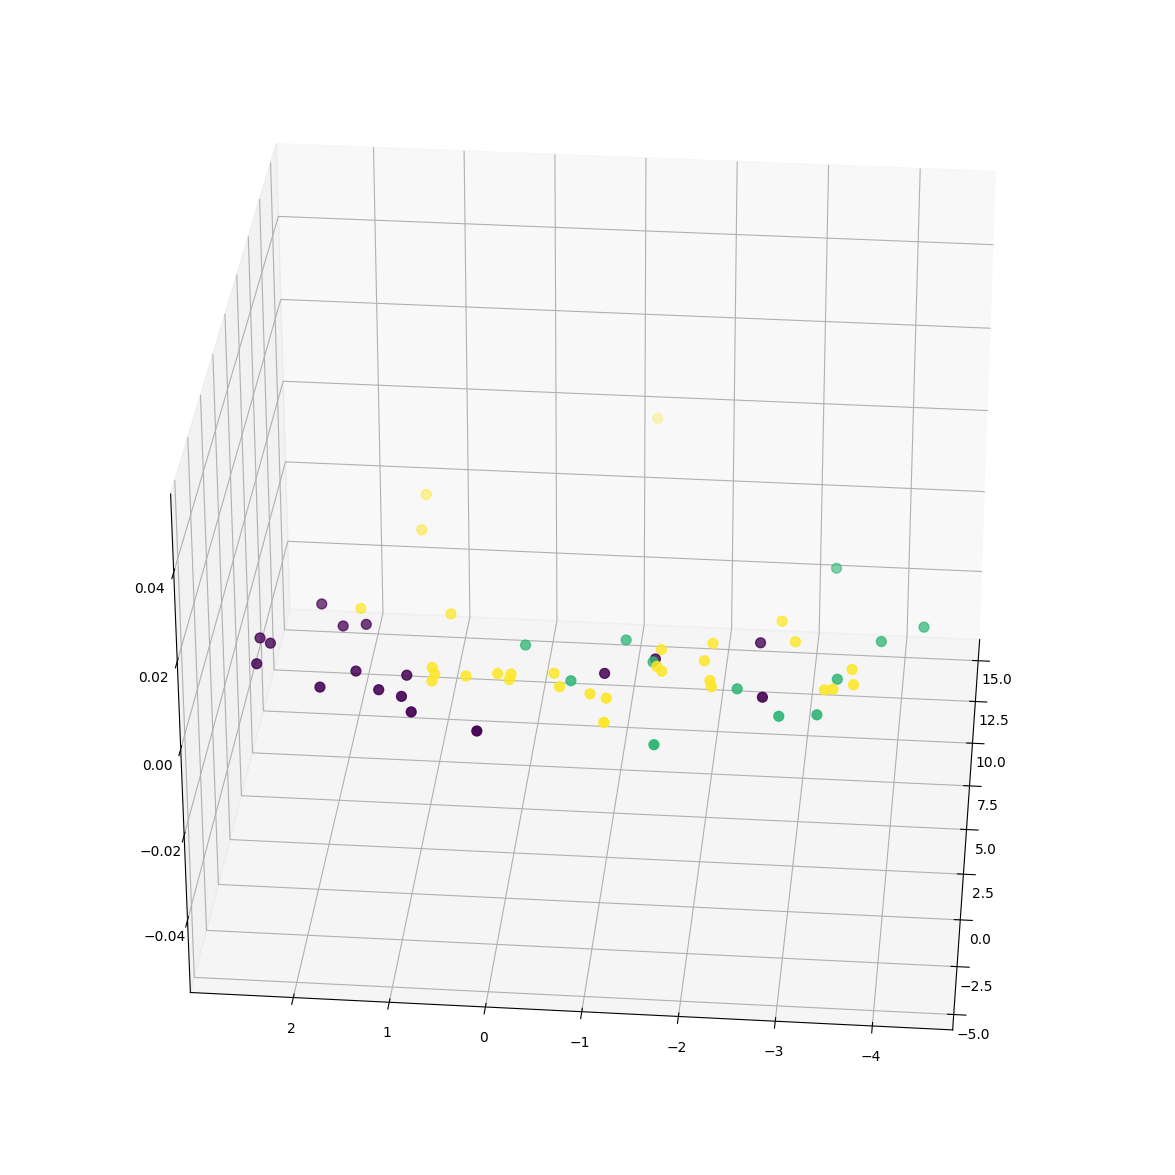

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(19,15))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(newdf1[:,0],newdf1[:,1],c=df1.Target,s=50)
ax.view_init(30,185)
plt.show()

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(19,15))

ax.plot(newdf1[:,0],newdf1[:,1],c=df1.Target,s=50)
ax.view_init(30,185)
plt.show()

ValueError: 0     1
1     3
2     1
3     1
4     4
5     4
6     1
7     3
8     1
9     3
10    4
11    4
12    3
13    1
14    4
15    1
16    4
17    1
18    3
19    3
20    4
21    1
22    4
23    1
24    4
25    4
26    4
27    4
28    3
29    4
30    4
31    1
32    4
33    1
34    1
35    4
36    3
37    4
38    3
39    4
40    4
41    4
42    1
43    4
44    4
45    4
46    4
47    1
48    4
49    4
50    1
51    3
52    3
53    3
54    4
55    4
56    4
57    1
58    4
Name: Target, dtype: int64 is not a valid value for color

<Figure size 1900x1500 with 0 Axes>